<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [ ]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.24.1 pandas==1.5.3 -q --user --no-warn-script-location

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importing Libraries for building Neural Network
import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization

# Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler

# Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/bank-1.csv')
df = data.copy()

## Data Overview

### Displaying the first and last 10 rows of the data

In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Analyzing Features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are 7 categorical values and 6 Numerical Variables

In [ ]:
# Dropping Non essential Columns
df.drop(['CustomerId','Surname', 'RowNumber'],axis=1,inplace=True)

### Checking Statistcal Summary


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


* **Credit Score:** The average credit score is 650. There are a few outliers within this column since there is a huge difference between the min and 25th percentile.

* **Geography:** The dataset consist of 3 nationalities, with majority of the customers coming from France.

* **Gender:** The data is well balanced with number of men being slighly higher than the number of women.

* **Age:** The majority of customers are middle aged. There is a huge difference between the 75th percentile and the Max value meaning there are a few customers within retirement age.

* **Tenure:** The most recent customers have been with the bank for 3 years which means that this custormer base is filled with people who know the bank well.

* **Balance:** There are some people with know money in the account while the richest person has about $ 250000 in their account as balance.

* **Number of Products:** Every customers has at least 1 product they have purchased from the bank.

* **Has Credit Card:** 70% of the customers in this database have credit cards.

* **IsActiveMember:** Half of the customers are active members of the bank.

* **Estimated Salary:** There a few customers with who recieve salaries above the 75th percentile. The least estimate is $11 while the most is about \$200000.

* **Exited:** 30% of the customers churned which is an indication of class imbalance.

### Checking for Missing Values

In [ ]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


There are no missing values within this dataset

### Checking for Duplicates

In [ ]:
df.duplicated().sum()

0

There are no duplicates in this dataset

## Exploratory Data Analysis

#### EDA Functions

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

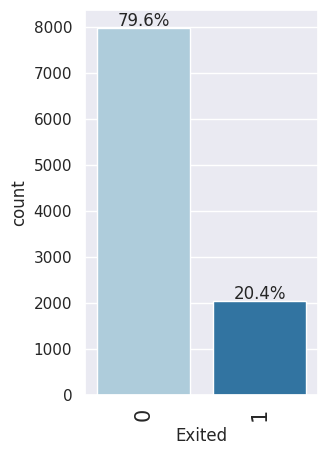

In [ ]:
# Analyzing Exited Column
labeled_barplot(df, 'Exited', perc=True)

This is an imbalanced dataset.

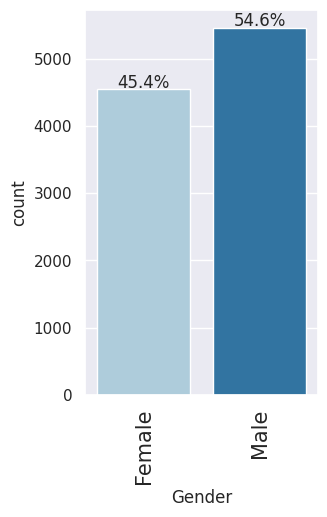

In [ ]:
# Analyzing Gender
labeled_barplot(df, 'Gender', perc=True)

There is slightly more males than females in this dataset.

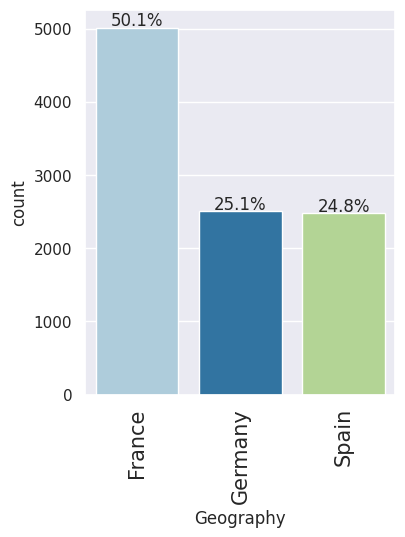

In [ ]:
# Analyzing Geography
labeled_barplot(df, 'Geography', perc=True)

The majority of people in this dataset come from france while the rest come from either Germany or Spain.

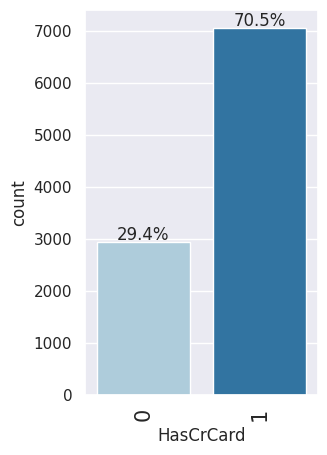

In [ ]:
# Analyzing Credit Card
labeled_barplot(df, 'HasCrCard', perc=True)

70% of the customers have a credit card with the bank while the rest don't.

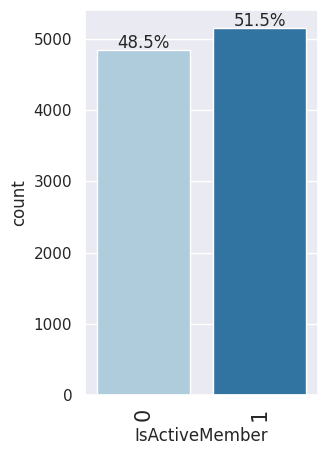

In [ ]:
# Analyzing Is an Active Member
labeled_barplot(df, 'IsActiveMember', perc=True)

About half of the customers are not really that active with the bank. This may suggest that they might be using alternative methods or using other products from other banks.

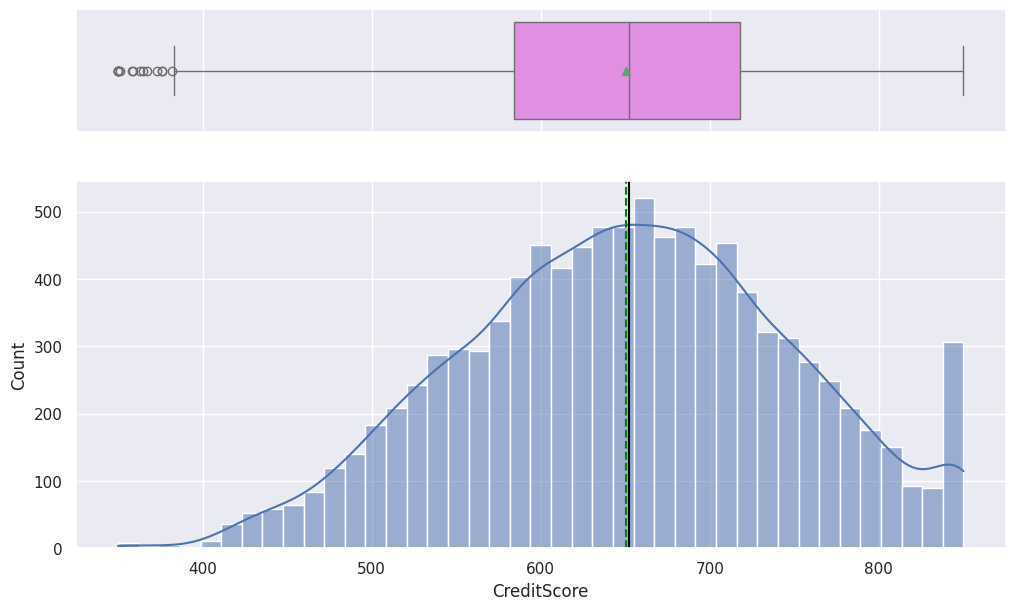

In [ ]:
# Analyzing Credit Score
histogram_boxplot(df, 'CreditScore', kde=True)

The data is slightly left skewed with the mean being a little less than the median. The majority of customers have a credit score ranging between roughly 575 - 725 which means they are low risk borrowers and they don't over use their credit card. The few outlier below 400 are high risk borrowers and are more likely to default.

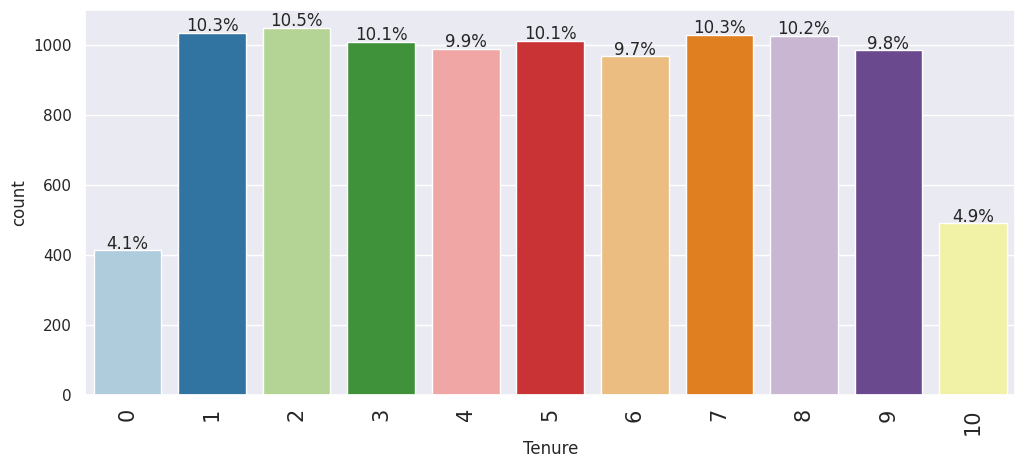

In [ ]:
# Analyzing Tenure
labeled_barplot(df, 'Tenure', perc=True)

This is a normal distribution meaning rangig from 0 - 10 years. This customer base has a mix of old and new customers, but the majority are old custormers. The new customers make up about 14% of the data.

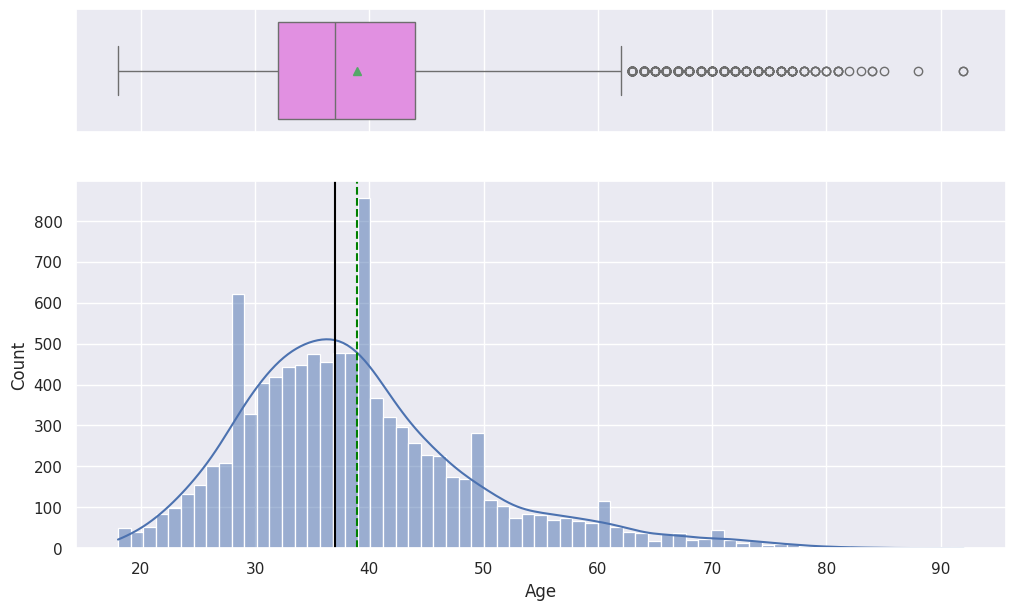

In [ ]:
# Analyzing Age
histogram_boxplot(df, 'Age', kde=True)

This is a right skewed dataset with the mean being slightly higher than the median. There are a lot of old people in this dataset represented as outliers. The majority of the customers are in the middle age class.


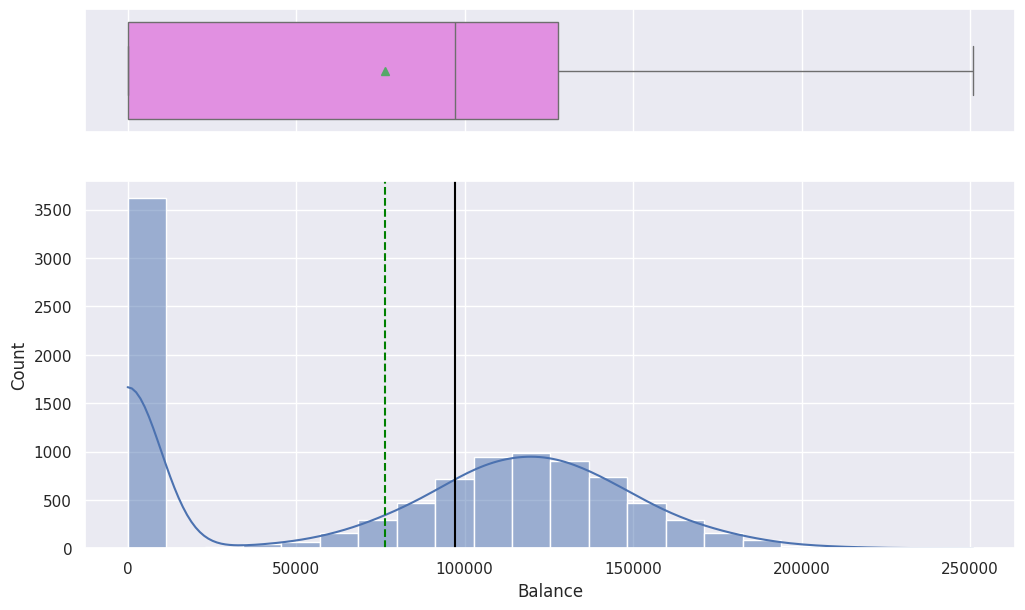

In [ ]:
# Analzing Balance
histogram_boxplot(df, "Balance", kde=True)

This data is heavily skewed because most of the customers don't have any money in their bank account. This could mean alot of things. It could be that the vast majority of customers are living paycheck to paycheck with minimal savings, or they may be saving in other account because they may find the interest rates of the bank unfavourable or they may be in a financially tough spot.

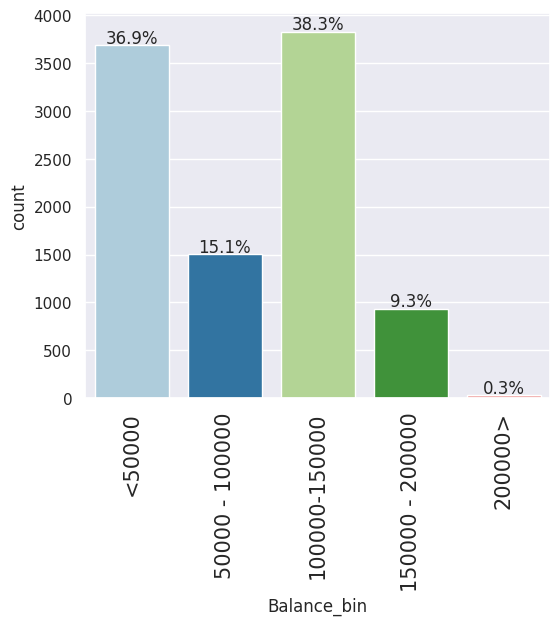

In [ ]:
df['Balance_bin']=pd.cut(df['Balance'], bins=[-np.inf, 50000, 100000, 150000, 200000, np.inf], labels=['<50000', '50000 - 100000', '100000-150000', '150000 - 200000', '200000>'])
labeled_barplot(df, 'Balance_bin', perc=True)

The large majority of customers have < $50000 in the account which is a confirmation that these people have low savings and may be suffering from a finantial issue. The second largest customer group are those between 100000 - 150000 dollars suggesting a healthy savings habit. A few customers are fall in teh high income class.

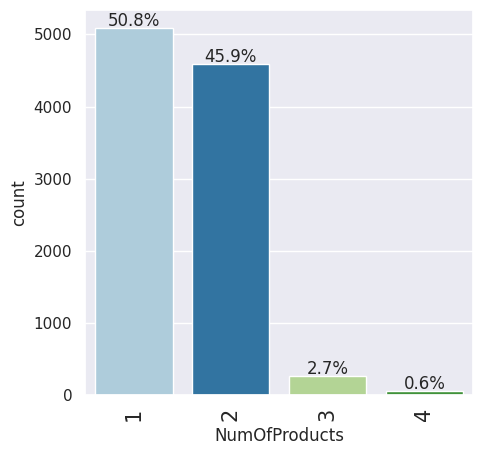

In [ ]:
# Analyzing Number of Products
labeled_barplot(df, 'NumOfProducts', perc=True)

All customers have products with the bank.

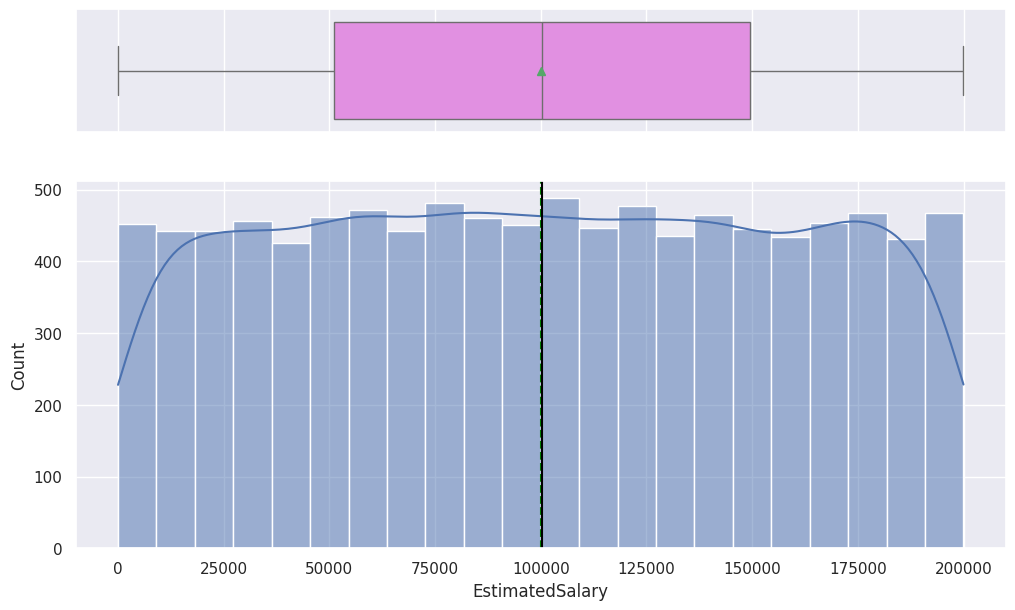

In [ ]:
# Analyzing Estimated Salary
histogram_boxplot(df, 'EstimatedSalary', kde=True)

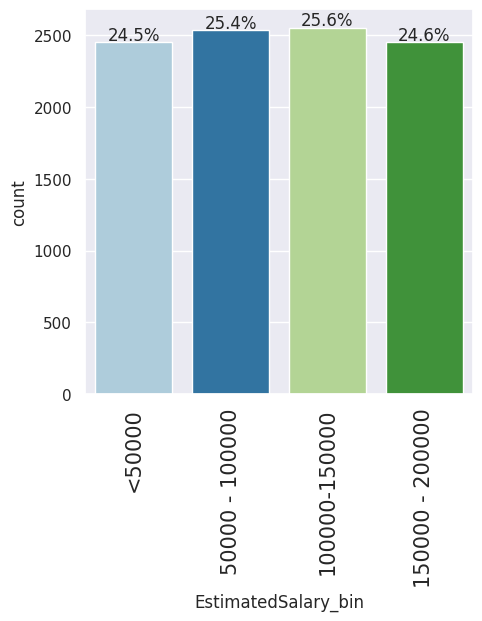

In [ ]:
df['EstimatedSalary_bin']=pd.cut(df['EstimatedSalary'], bins=[-np.inf, 50000, 100000, 150000, np.inf], labels=['<50000', '50000 - 100000', '100000-150000', '150000 - 200000'])
labeled_barplot(df, 'EstimatedSalary_bin', perc=True)

The data is normaly distributed hence all financial classes of customers are found here.

### Bivariate Analysis

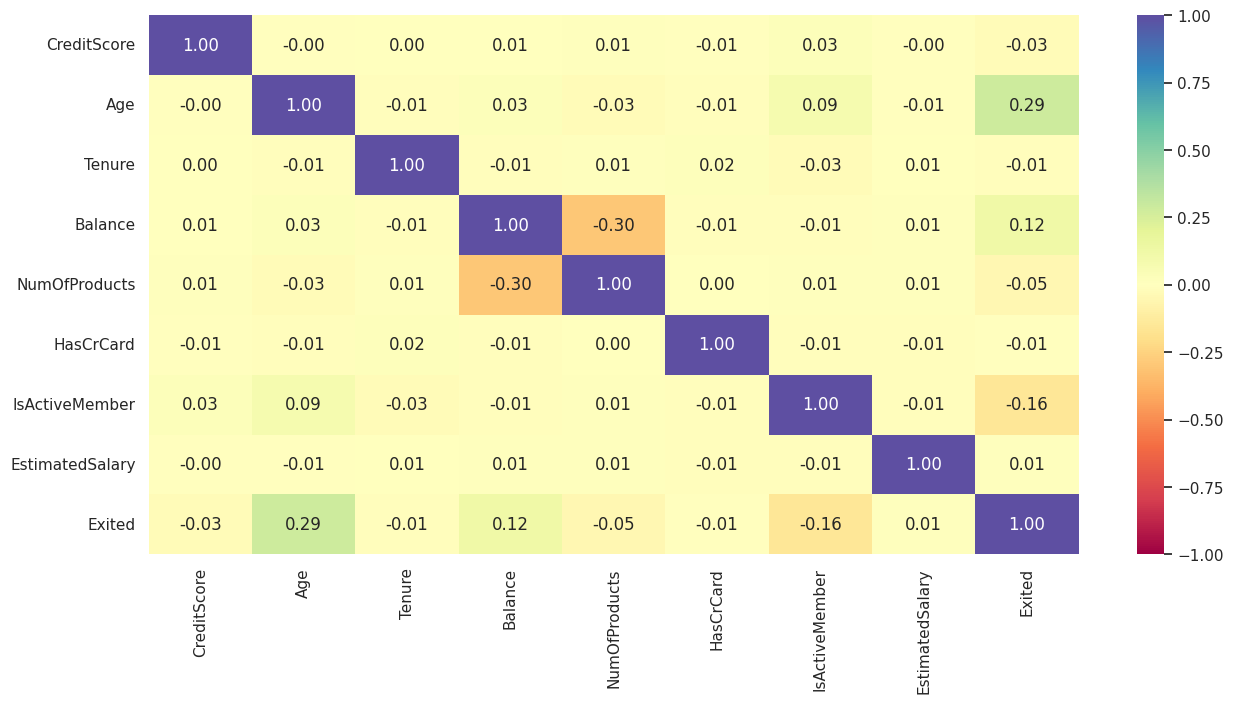

In [ ]:
# Selecting Numerical Datatypes
numeric_col = df.select_dtypes(include=np.number).columns

# Ploting Heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df[numeric_col].corr(), vmin=-1, vmax=1, fmt= '.2f', cmap='Spectral', annot=True);

* Balance has a negative correlation with number of products. Which suggest that people with less disposable income tend to use more products such as personal loans, credit cards, etc while customers with less more disposalble income tend to use less products. This could be because they do not have need for them.

* Age positively correlates with exited. So older customers tend to leave the bank than the younger customers.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


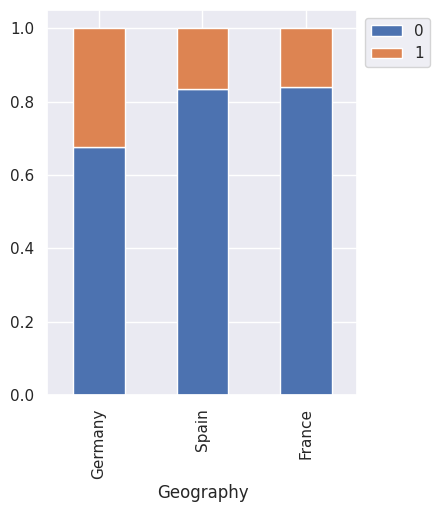

In [ ]:
# Analzying Geography vs Existed Customers
stacked_barplot(df, 'Geography', 'Exited')

More customer churns have been recorded in Germany than in Spain and France.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


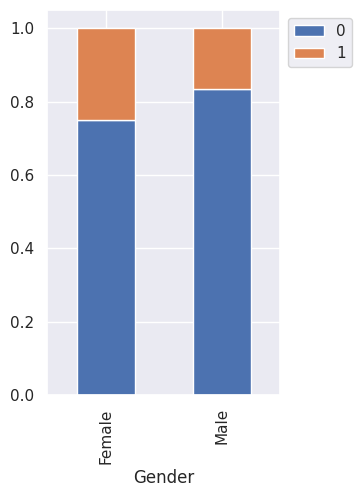

In [ ]:
# Analyzing Gender vs Exited Customerws
stacked_barplot(df, 'Gender', 'Exited')

Though females are the minority in this dataset, they are the ones who are more likely to churn.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


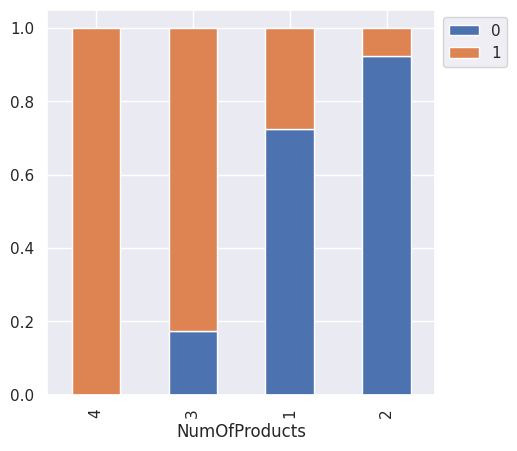

In [ ]:
# Analyzing Number of Products vs Exited Customers
stacked_barplot(df, 'NumOfProducts', 'Exited')

Customers with a higher number of products had a higher churn rate than their later.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


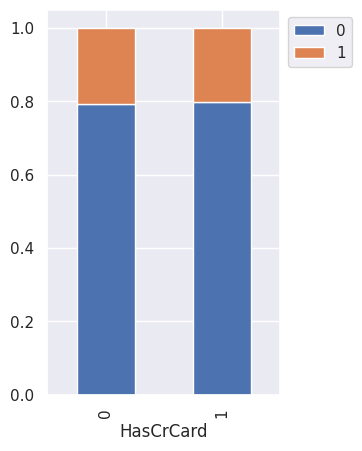

In [ ]:
# Analyzing Credit Card Users vs Exited Customers
stacked_barplot(df, 'HasCrCard', 'Exited')

Credit card does not determine whether a customer will churn or not.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


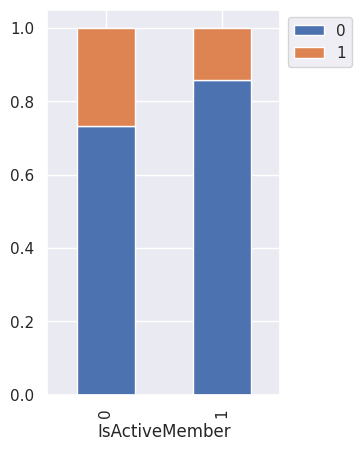

In [ ]:
# Analyzing Active Members vs Exited Customers
stacked_barplot(df, 'IsActiveMember', 'Exited')

The majority of the customers who churned weren't active members of the bank while a small portion of the active members churned. This might be due to customer disatisfaction.

Exited              0     1    All
Balance_bin                       
All              7963  2037  10000
100000-150000    2843   987   3830
<50000           3166   526   3692
50000 - 100000   1209   300   1509
150000 - 200000   730   205    935
200000>            15    19     34
------------------------------------------------------------------------------------------------------------------------


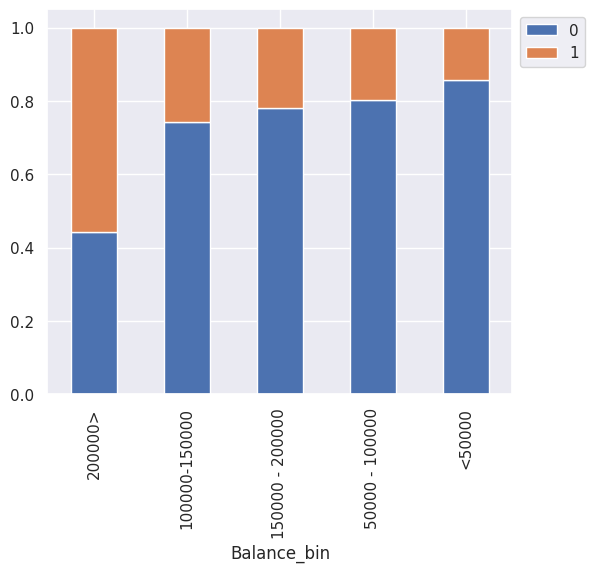

In [ ]:
# Analyzing Balance vs Exited Customers
stacked_barplot(df, 'Balance_bin', 'Exited')

Customers who had a disposable income of about $200000 and above had a chance of churning.

Exited                  0     1    All
EstimatedSalary_bin                   
All                  7963  2037  10000
150000 - 200000      1928   527   2455
100000-150000        2038   517   2555
50000 - 100000       2033   504   2537
<50000               1964   489   2453
------------------------------------------------------------------------------------------------------------------------


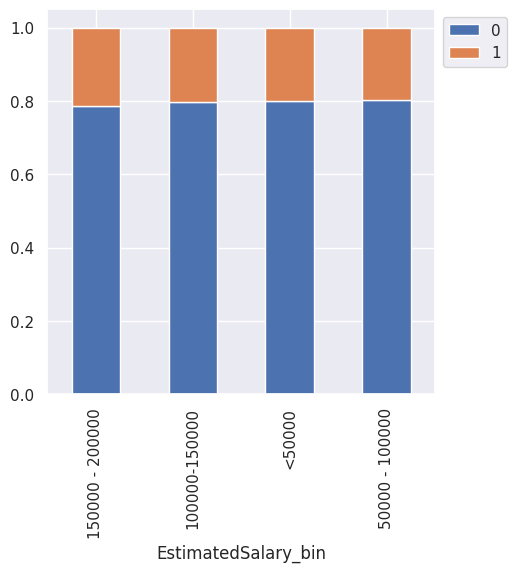

In [ ]:
# Estimated Salary vs Exited Customers
stacked_barplot(df, 'EstimatedSalary_bin', 'Exited')

The estimated salary of customers does not determine whether they churn or not.

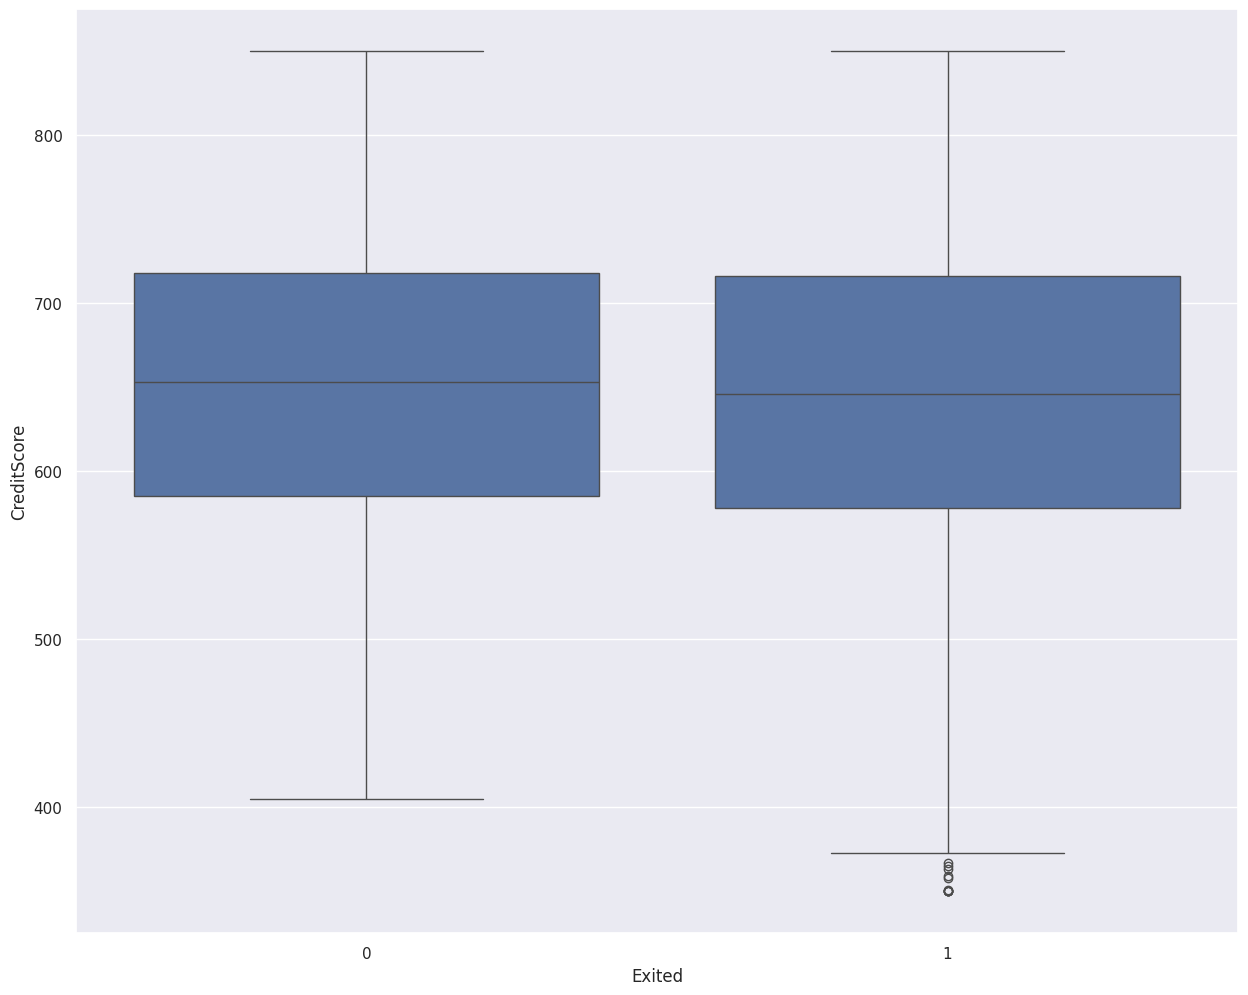

In [ ]:
# Analyzing Credit Score vs Exited Customers
plt.figure(figsize=(15,12))
sns.boxplot(data=df, x='Exited', y='CreditScore');

The churned customers had a credit score of between 600 - 700 (Moderate risk spenders) and few of them had a credit score lower than 400 (high risk spenders).

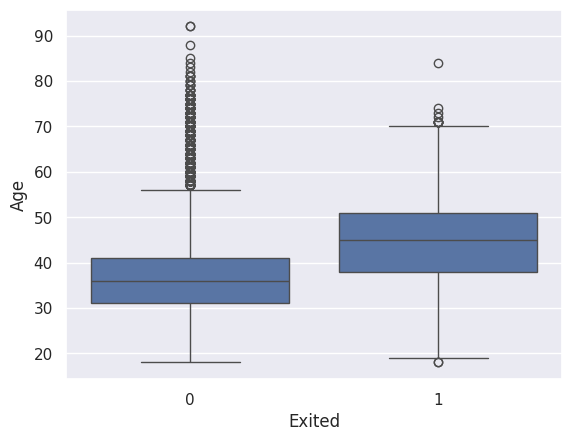

In [ ]:
# Analyzing Age vs Exited Customers
sns.boxplot(data=df, x='Exited', y='Age');

Most of the people that chuned were middle aged with few of them being old aged.

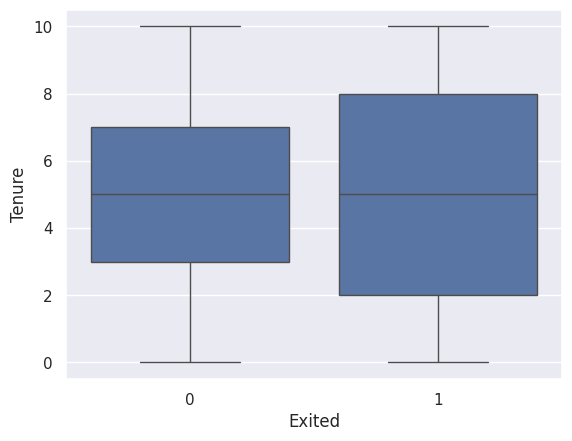

In [ ]:
# Analyzing Tenure vs Exited Customer
sns.boxplot(data=df, x='Exited', y='Tenure');

The people who churned were a mix of old and new customers.

## Data Preprocessing

### Dropping Non Essention Columns

In [ ]:
# Dropping th Binned Columns
df.drop(columns=['Balance_bin', 'EstimatedSalary_bin'], axis=1, inplace=True)

### Dummy Variable Creation

In [ ]:
# Calling OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Selecting Categorical Columns
cat_col = df.select_dtypes(include='object').columns

# Fitting to data
encoded_df = encoder.fit_transform(df[cat_col])

# Creating a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(cat_col))

# Dropping original categorical columns
df = df.drop(columns=cat_col, axis=1)

# Concatenating encoded DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
# Assigning Dummy Variables
X = df.drop('Exited', axis=1)
y = df['Exited']

### Train-validation-test Split

In [ ]:
# Spliting data into training and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y)

# Spliting data into training and Validation set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

In [ ]:
# Displaying the shape of the data
print('X_train: ', X_train.shape)
print('X_val: ', X_val.shape)
print('X_test: ', X_test.shape)

X_train:  (7000, 11)
X_val:  (1500, 11)
X_test:  (1500, 11)


### Data Normalization

In [ ]:
# Selecting columns to be normalized
numeric_col = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary', 'Balance']

# Calling StandarScaler
scaler = StandardScaler()

# Fitting scaler to training data
scaler.fit(X_train[numeric_col])

# Transforming training, validation and test set using fitted scaler
X_train[numeric_col] = scaler.transform(X_train[numeric_col])
X_val[numeric_col] = scaler.transform(X_val[numeric_col])
X_test[numeric_col] = scaler.transform(X_test[numeric_col])

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5011,-1.752769,0.776553,1.030650,-0.012400,-0.924122,1,0,-1.291688,0.0,1.0,1.0
8792,-1.577280,-0.471395,-1.042298,-1.220110,0.802748,1,1,-0.293202,0.0,0.0,1.0
1911,-0.565640,0.200577,1.376141,-1.220110,0.802748,1,0,-1.639431,0.0,0.0,1.0
4851,-1.236626,0.872549,-1.733281,-1.220110,-0.924122,1,0,-0.258395,0.0,0.0,0.0
7786,-0.658545,-0.567391,1.721633,-0.147887,0.802748,1,1,0.713534,0.0,1.0,0.0


## Model Building

### Model Evaluation Criterion

* If the model predicts wrongly that a customer will churn, it would lead to unnessary retention efforts by the bank.

* However, if the model predicts wrongly that a customer will stay, it would lead to a finacial loss.

* Due to this, we shall choose recall because we want a model that has the least amount of false negatives.

### Utility Functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Calculating class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Creating a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558306422676713, 1: 4.908835904628331}

In [ ]:
# Defining Batch_Size and Number of Epochs
epochs = 100
batch_size = 128

### Neural Network with SGD Optimizer

In [ ]:
# Initializing Model
model = Sequential([
    Dense(64, activation='relu', input_dim=11), # input layer of 11 columns
    Dense(32, activation='relu'), # Second Hidden Layer
    Dense(1, activation='sigmoid') # Output Layer
])

In [ ]:
# Compiling Model
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Displaying Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the Model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6012 - loss: 1.3079 - val_accuracy: 0.7853 - val_loss: 0.4732
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7262 - loss: 1.0692 - val_accuracy: 0.7840 - val_loss: 0.4525
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7468 - loss: 1.0083 - val_accuracy: 0.7907 - val_loss: 0.4417
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7552 - loss: 0.9867 - val_accuracy: 0.7980 - val_loss: 0.4334
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7648 - loss: 0.9773 - val_accuracy: 0.8113 - val_loss: 0.4246
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7709 - loss: 0.9684 - val_accuracy: 0.8160 - val_loss: 0.4181
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7744 - loss: 0.9622 - val_accuracy: 0.8233 - val_loss: 0.4128
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7794 - loss: 0.9560 - val_accuracy: 0

In [ ]:
print('Time Taken (s):', end - start)

Time Taken (s): 19.414467811584473


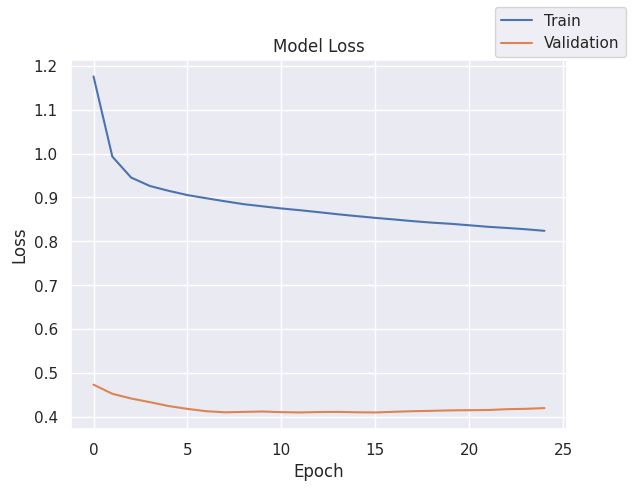

In [ ]:
# plotting loss function
plot(history, 'loss')

In [ ]:
# Displaying Training Performance Scores
model_SGD_train_perf = model_performance_classification(model, X_train, y_train)
model_SGD_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.853571,0.853571,0.860513,0.856476


In [ ]:
# Displaying Validation Performance Scores
model_SGD_val_perf = model_performance_classification(model, X_val, y_val)
model_SGD_val_perf

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.826667,0.826667,0.83196,0.829068


The model was overfitting slightly. The rate of improvement over epochs is also slow. So I set the momentum to 0.9 since by default its off, there was an improvement in recall.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
# Clearing the current Keras session
tf.keras.backend.clear_session()

In [ ]:
# Initializing Model
model = Sequential([
    Dense(64, activation='relu', input_dim=11), # input layer of 11 columns
    Dense(32, activation='relu'), # Second Hidden Layer
    Dense(1, activation='sigmoid') # Output Layer
])

In [ ]:
# Compiling Model
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy')

In [ ]:
# Fitting the model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.3702 - val_loss: 0.5905
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1730 - val_loss: 0.5449
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0743 - val_loss: 0.5217
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0160 - val_loss: 0.5081
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9875 - val_loss: 0.5010
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9717 - val_loss: 0.4974
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9617 - val_loss: 0.4943
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9538 - val_loss: 0.4916
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9467 - val_loss: 0.4882
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9407 - val_loss: 0.4856
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9354 - val_loss: 0.4830
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9

In [ ]:
print('Time Taken (s):', end - start)

Time Taken (s): 46.010552644729614


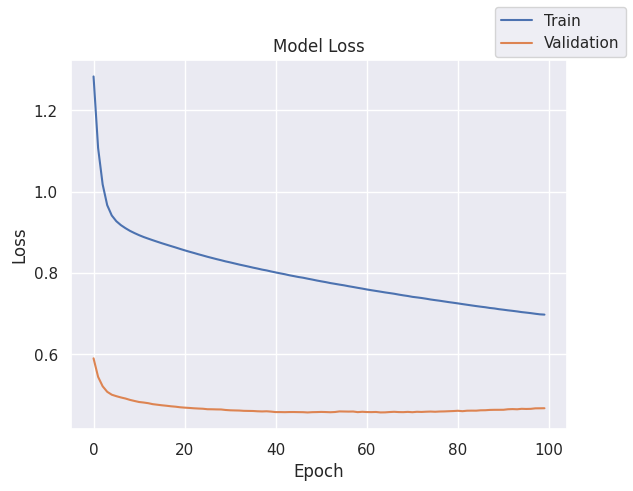

In [ ]:
# plotting loss function
plot(history, 'loss')

In [ ]:
# Analyzing Training Performance
model_Adam_train_perf = model_performance_classification(model, X_train, y_train)
model_Adam_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.859,0.859,0.880082,0.865608


In [ ]:
# Analyzing Validation Performance
model_Adam_val_perf = model_performance_classification(model, X_val, y_val)
model_Adam_val_perf

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.796667,0.796667,0.822875,0.806315


Generalisation is better but still appears to be overfitting a little. The model is faster than our previous SGD model.

### Neural Network with Adam Optimizer and Dropout

In [ ]:
# Clearing the current Keras session
tf.keras.backend.clear_session()

In [ ]:
# Initializing Model
model = Sequential([
    Dense(64, activation='relu', input_dim=11), # input layer of 11 columns
    Dropout(0.2),
    Dense(32, activation='relu'), # Second Hidden Layer
    Dropout(0.2),
    Dense(1, activation='sigmoid') # Output Layer
])

In [ ]:
# Compiling Model
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy')

In [ ]:
# Fitting the model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.3239 - val_loss: 0.5498
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1648 - val_loss: 0.5106
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1006 - val_loss: 0.4941
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0522 - val_loss: 0.4754
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0249 - val_loss: 0.4840
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0122 - val_loss: 0.4863
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0049 - val_loss: 0.4764
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0028 - val_loss: 0.4730
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9916 - val_loss: 0.4693
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9836 - val_loss: 0.4680
Epoch 11/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9795 - val_loss: 0.4695
Epoch 12/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [ ]:
print('Time Taken (s):', end - start)

Time Taken (s): 25.020728588104248


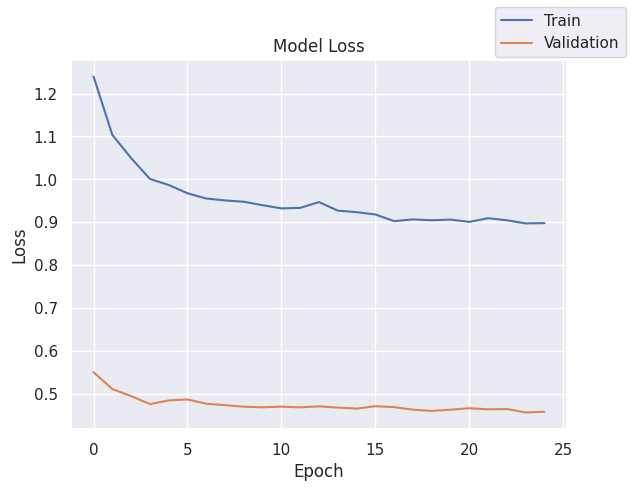

In [ ]:
# plotting loss function
plot(history, 'loss')

In [ ]:
# Analyzing Training Performance
model_Adamdrop_train_perf = model_performance_classification(model, X_train, y_train)
model_Adamdrop_train_perf

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.828286,0.828286,0.857139,0.837532


In [ ]:
# Analyzing Validation Performance
model_Adamdrop_val_perf = model_performance_classification(model, X_val, y_val)
model_Adamdrop_val_perf

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.787333,0.787333,0.824687,0.799966


Model performs worse than previous models

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
# Clearing the current Keras session
tf.keras.backend.clear_session()

In [ ]:
# Calling Smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# Appling SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
# Initializing Model
model = Sequential([
    Dense(64, activation='relu', input_dim=11), # input layer of 11 columns
    Dense(32, activation='relu'), # Second Hidden Layer
    Dense(1, activation='sigmoid') # Output Layer
])

In [ ]:
# Compiling Model
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy')

In [ ]:
# Fitting the model
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6120 - val_loss: 0.5474
Epoch 2/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4521 - val_loss: 0.5290
Epoch 3/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4274 - val_loss: 0.5253
Epoch 4/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4187 - val_loss: 0.5233
Epoch 5/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4127 - val_loss: 0.5187
Epoch 6/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4077 - val_loss: 0.5149
Epoch 7/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4034 - val_loss: 0.5137
Epoch 8/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3996 - val_loss: 0.5113
Epoch 9/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3960 - val_loss: 0.5079
Epoch 10/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3925 - val_loss: 0.5051
Epoch 11/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3893 - val_loss: 0.5017
Epoch 12/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [ ]:
print('Time Taken (s):', end - start)

Time Taken (s): 25.07548451423645


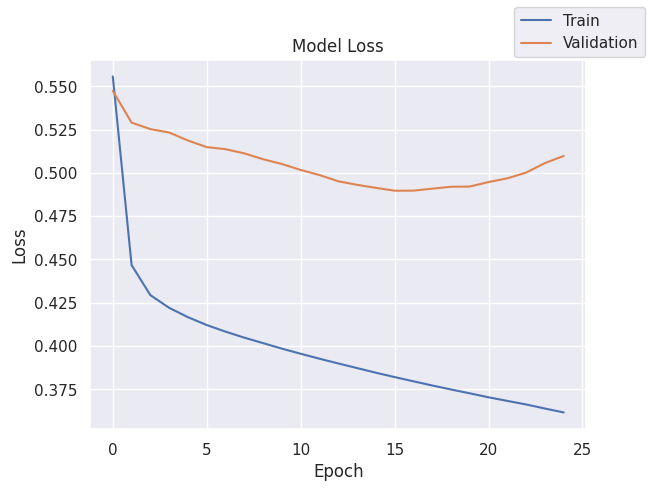

In [ ]:
# plotting loss function
plot(history, 'loss')

In [ ]:
# Analyzing Training Performance
model_SGDover_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_SGDover_train_perf

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.845353,0.845353,0.84566,0.845319


In [ ]:
# Analyzing Validation Performance
model_SGDover_val_perf = model_performance_classification(model, X_val, y_val)
model_SGDover_val_perf

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.768,0.768,0.811935,0.782855


The validation set not generalizing well on the model.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
# Clearing the current Keras session
tf.keras.backend.clear_session()

In [ ]:
# Appling SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
# Initializing Model
model = Sequential([
    Dense(64, activation='relu', input_dim=11), # input layer of 11 columns
    Dense(32, activation='relu'), # Second Hidden Layer
    Dense(1, activation='sigmoid') # Output Layer
])

In [ ]:
# Compiling Model
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy')

In [ ]:
# Fitting the model
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5839 - val_loss: 0.5568
Epoch 2/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4516 - val_loss: 0.5251
Epoch 3/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4257 - val_loss: 0.5144
Epoch 4/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4157 - val_loss: 0.5083
Epoch 5/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4086 - val_loss: 0.5032
Epoch 6/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4029 - val_loss: 0.5013
Epoch 7/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3979 - val_loss: 0.4997
Epoch 8/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3934 - val_loss: 0.4984
Epoch 9/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3893 - val_loss: 0.4971
Epoch 10/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3854 - val_loss: 0.4964
Epoch 11/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3818 - val_loss: 0.4956
Epoch 12/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [ ]:
print('Time Taken (s):', end - start)

Time Taken (s): 33.42661213874817


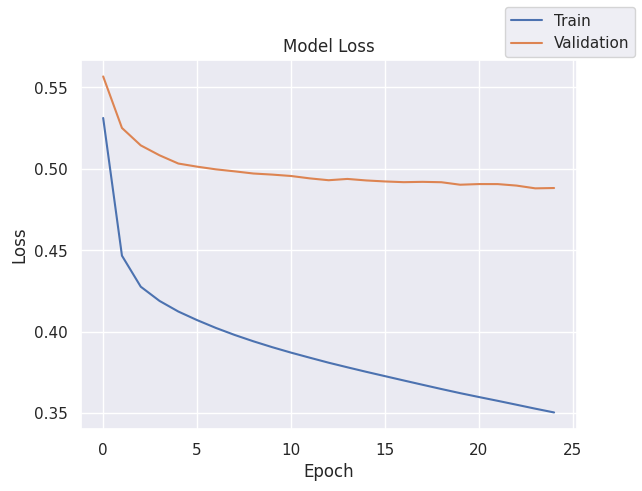

In [ ]:
# plotting loss function
plot(history, 'loss')

In [ ]:
# Analyzing Training Performance
model_Adamover_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_Adamover_train_perf

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.852171,0.852171,0.852217,0.852166


In [ ]:
# Analyzing Validation Performance
model_Adamover_val_perf = model_performance_classification(model, X_val, y_val)
model_Adamover_val_perf

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.775333,0.775333,0.810585,0.787937


Slightly improved performance however Recall is bad.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
# Clearing the current Keras session
tf.keras.backend.clear_session()

In [ ]:
# Appling SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
# Initializing Model
model = Sequential([
    Dense(64, activation='relu', input_dim=11), # input layer of 11 columns
    Dropout(0.2),
    Dense(32, activation='relu'), # Second Hidden Layer
    Dropout(0.2),
    Dense(1, activation='sigmoid') # Output Layer
])

In [ ]:
# Compiling Model
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy')

In [ ]:
# Fitting the model
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.6138 - val_loss: 0.5374
Epoch 2/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4960 - val_loss: 0.5302
Epoch 3/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4560 - val_loss: 0.5096
Epoch 4/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4493 - val_loss: 0.5037
Epoch 5/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4379 - val_loss: 0.4983
Epoch 6/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4310 - val_loss: 0.4889
Epoch 7/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4256 - val_loss: 0.4987
Epoch 8/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4249 - val_loss: 0.4923
Epoch 9/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4191 - val_loss: 0.4891
Epoch 10/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4173 - val_loss: 0.4914
Epoch 11/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4145 - val_loss: 0.4844
Epoch 12/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

In [ ]:
print('Time Taken (s):', end - start)

Time Taken (s): 40.15832996368408


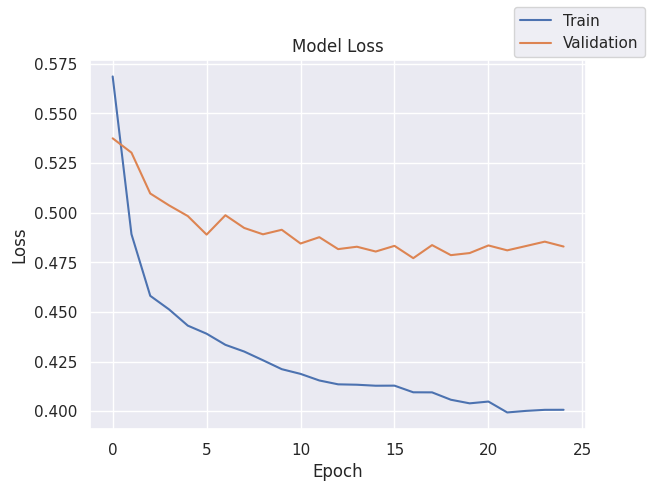

In [ ]:
# plotting loss function
plot(history, 'loss')

In [ ]:
# Analyzing Training Performance
model_Adamoverdrop_train_perf = model_performance_classification(model, X_train_over, y_train_over)
model_Adamover_train_perf

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.852171,0.852171,0.852217,0.852166


In [ ]:
# Analyzing Validation Performance
model_Adamoverdrop_val_perf = model_performance_classification(model, X_val, y_val)
model_Adamover_val_perf

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.775333,0.775333,0.810585,0.787937


Too many oscillations, and the model is not generalizing well for validation set.

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_Adam_train_perf.T,
        model_Adamdrop_train_perf.T,
        model_Adamover_train_perf.T,
        model_Adamoverdrop_train_perf.T,
        model_SGD_train_perf.T,
        model_SGDover_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (Adam, No Regularization)",
    "Neural Network (Adam, Dropout)",
    "Neural Network (Adam , SMOTE)",
    "Neural Network (Adam, SMOTE, Dropout)",
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD, SMOTE)"
]

In [ ]:
#Validation performance comparison

models_val_comp_df = pd.concat(
    [
        model_Adam_val_perf.T,
        model_Adamdrop_val_perf.T,
        model_Adamover_val_perf.T,
        model_Adamoverdrop_val_perf.T,
        model_SGD_val_perf.T,
        model_SGDover_val_perf.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Neural Network (Adam, No Regularization)",
    "Neural Network (Adam, Dropout)",
    "Neural Network (Adam , SMOTE)",
    "Neural Network (Adam, SMOTE, Dropout)",
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD, SMOTE)"
]

In [ ]:
models_train_comp_df

,"Neural Network (Adam, No Regularization)","Neural Network (Adam, Dropout)","Neural Network (Adam , SMOTE)","Neural Network (Adam, SMOTE, Dropout)","Neural Network (SGD, No Regularization)","Neural Network (SGD, SMOTE)"
Accuracy,0.840143,0.828286,0.852171,0.836114,0.853571,0.845353
Recall,0.840143,0.828286,0.852171,0.836114,0.853571,0.845353
Precision,0.858306,0.857139,0.852217,0.836569,0.860513,0.845660
F1 Score,0.846592,0.837532,0.852166,0.836059,0.856476,0.845319


In [ ]:
models_val_comp_df

,"Neural Network (Adam, No Regularization)","Neural Network (Adam, Dropout)","Neural Network (Adam , SMOTE)","Neural Network (Adam, SMOTE, Dropout)","Neural Network (SGD, No Regularization)","Neural Network (SGD, SMOTE)"
Accuracy,0.802667,0.787333,0.775333,0.767333,0.826667,0.768000
Recall,0.802667,0.787333,0.775333,0.767333,0.826667,0.768000
Precision,0.825817,0.824687,0.810585,0.819013,0.831960,0.811935
F1 Score,0.811334,0.799966,0.787937,0.783719,0.829068,0.782855


In [ ]:
models_train_comp_df.loc["Recall"] - models_val_comp_df.loc["Recall"]

,Recall
"Neural Network (Adam, No Regularization)",0.037476
"Neural Network (Adam, Dropout)",0.040952
"Neural Network (Adam , SMOTE)",0.076837
"Neural Network (Adam, SMOTE, Dropout)",0.068781
"Neural Network (SGD, No Regularization)",0.026905
"Neural Network (SGD, SMOTE)",0.077353


The NN model with SGD (No, regularization) performs the best in terms of recall and precision.

## Training Model on Test Set

In [ ]:
# Clearing the current Keras session
tf.keras.backend.clear_session()

In [ ]:
# Initializing Model
model = Sequential([
    Dense(64, activation='relu', input_dim=11), # input layer of 11 columns
    Dense(32, activation='relu'), # Second Hidden Layer
    Dense(1, activation='sigmoid') # Output Layer
])

In [ ]:
# Compiling Model
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the Model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5227 - loss: 1.3311 - val_accuracy: 0.7833 - val_loss: 0.4720
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7373 - loss: 1.0679 - val_accuracy: 0.7967 - val_loss: 0.4535
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7526 - loss: 1.0009 - val_accuracy: 0.8007 - val_loss: 0.4440
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7590 - loss: 0.9830 - val_accuracy: 0.8067 - val_loss: 0.4357
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7660 - loss: 0.9708 - val_accuracy: 0.8087 - val_loss: 0.4330
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7684 - loss: 0.9628 - val_accuracy: 0.8087 - val_loss: 0.4295
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7734 - loss: 0.9554 - val_accuracy: 0.8113 - val_loss: 0.4274
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7767 - loss: 0.9494 - val_accuracy: 0.

In [ ]:
print('Time Taken (s):', end - start)

Time Taken (s): 25.613707542419434


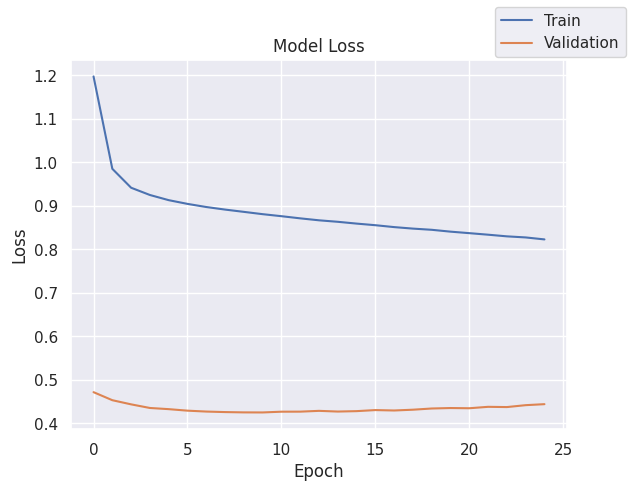

In [ ]:
# plotting loss function
plot(history, 'loss')

In [ ]:
# Displaying Training Performance Scores
model_SGD_test_perf = model_performance_classification(model, X_test, y_test)
model_SGD_test_perf

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.816667,0.816667,0.832493,0.822903


Model generalizes well on test set.

## Actionable Insights and Business Recommendations

* The bank should endeavour to upsell premium products to their rich customers.

* The bank should make taylor their products to suit the needs of their aged customers.

* The bank should also review their criteria for increasing credit scores.



<font size=6 color='blue'>Power Ahead</font>
___